In [ ]:
!pip install tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models,transforms
from torchvision.utils import make_grid
from torchvision.datasets import MNIST
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter
from torchsummary import summary

In [ ]:
# MNIST
def mnist(batch_sz, valid_size=0.2, shuffle=True, random_seed=2000):
    num_classes = 10
    transform_train = transforms.Compose([
                        transforms.RandomCrop(28, padding=4), # يجلس يلعب في الصورة عشان يزيد دقة المودل
                        transforms.ToTensor(), #يرجع الصورة لاصلها عشان ما نلعب في الداتا
                    ])
    
    transform_valid = transforms.Compose([
                        transforms.ToTensor(),
                    ])
    
    transform_test = transforms.Compose([
                        transforms.ToTensor(),
                    ])
    

    # Training dataset
    train_data = MNIST(root='./datasets', train=True, download=True, transform=transform_train)
    valid_data = MNIST(root='./datasets', train=True, download=True, transform=transform_valid)
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    if shuffle == True:
        np.random.seed(random_seed)
        np.random.shuffle(indices)
    train_idx, valid_idx = indices[split:], indices[:split]

    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_sz, sampler=train_sampler,pin_memory=True)
    valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_sz, sampler=valid_sampler,pin_memory=True)

    # Test dataset
    test_data = MNIST(root='./datasets', train=False, download=True, transform=transform_test)
    test_loader = torch.utils.data.DataLoader(test_data,
                                              batch_size=batch_sz, shuffle=False, pin_memory=True)

    return train_loader, valid_loader, test_loader



In [ ]:
batch_sz=64 # this is batch size i.e. the number of rows in a batch of data
train_loader, valid_loader, test_loader=mnist(batch_sz) 

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



torch.Size([64, 1, 28, 28])


Text(0.5, 1.0, '3')

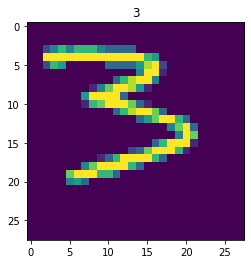

In [ ]:
tl = iter(train_loader)
batch = next(tl)

print((batch[0].shape))
sample = 13
plt.imshow(batch[0][sample,0,:,:])
plt.title(batch[1][sample].item())

In [ ]:
class CNN(nn.Module):

  def __init__(self):
     super().__init__()
     self.conv1 = nn.Conv2d(1,9,5,1)
     # (num of chaneel , output chaneel(hay), filte size , stride)
     self.conv2 = nn.Conv2d(9,40,5,1)
     #   (تاني رقم اخترناه فوق , output chaneel(hay) , filte size , stride)
     self.L1 = nn.Linear(4*4*40,100) #(نطلعو بحسبة معينة ونقدر نستعمل طريقة اسهل اننا نعمل رن وهو يقلي الرقم يلي المفروض يكون  , 100 مدري كيف طلعناه يمكن 2*10؟)
     self.L2 = nn.Linear(100,10) # 10 هي عدد lable

# fetcher stractur
  def forward(self,x):
      # x -> (28,28)
      x = self.conv1(x)
      # x -> (24,24)
      x = F.relu(x)
      x = F.max_pool2d(x,(2,2))
      # x -> (12,12)

      x = self.conv2(x)
      # x -> (8,8)
      x = F.relu(x)
      x = F.max_pool2d(x,(2,2))
      # x -> (4,4)

      x = x.view(-1,4*4*40)
      x = self.L1(x)
      x = F.relu(x)
      x = self.L2(x)

      return x


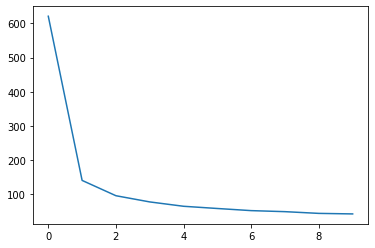

In [ ]:
device = torch.device("cpu")
net = CNN() 
net = net.to(device)


optimizer = optim.SGD(net.parameters(), lr=0.1 , momentum=0.0)

num_epochs = 10 
ls = []

for i in range(num_epochs):

  total_loss = 0
  for batch in train_loader:
    X = batch[0].to(device) 
    Y = batch[1].to(device)

    logits = net(X)
    loss = F.cross_entropy(logits , Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss+=loss.item()

  ls.append(total_loss) # the points 

plt.plot(ls) # drow the graph


In [ ]:
cnn = CNN()

In [ ]:
 x = torch.randn(2,1,28 ,28)
 # 1 : same the up code
 # 2 : like i want 
 # 28 : size of pic
 x.shape

torch.Size([2, 1, 28, 28])

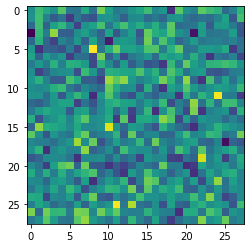

In [ ]:
plt.imshow(x[-1].view(28,28)) # print the figer